In [2]:
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor
import numpy as np
import time
import matplotlib.pyplot as plt
import glob
from PIL import Image
import random
import string
%matplotlib inline

In [3]:
MULTITHREADING_TITLE="Multithreading"
MULTIPROCESSING_TITLE="Multiprocessing"

def visualize_runtimes(results, title):
    start,stop = np.array(results).T
    plt.barh(range(len(start)),stop-start,left=start)
    plt.grid(axis='x')
    plt.ylabel("Tasks")
    plt.xlabel("Seconds")
    plt.title(title)
    return stop[-1]-start[0]

In [4]:
def multithreading(func, args, workers):
    begin_time = time.time()
    with ThreadPoolExecutor(max_workers=workers) as executor:
        res = executor.map(func, args, [begin_time for i in range(len(args))])
    return list(res)
        
def multiprocessing(func, args, workers):
    begin_time = time.time()
    with ProcessPoolExecutor(max_workers=workers) as executor:
        res = executor.map(func, args, [begin_time for i in range(len(args))])
    return list(res)

In [5]:
from urllib.request import urlopen

def download(url, base):
    start = time.time() - base
    try:
        resp = urlopen(url)
    except Exception as e:
        print ('ERROR: %s' % e)
    stop = time.time() - base
    return start,stop

In [9]:
N = 16
URL = 'http://www.africau.edu/images/default/sample.pdf'
urls = [URL for i in range(N)]

In [11]:
%timeit -n

NameError: name 'n' is not defined

In [10]:
%timeit -n 1 [download(url, 1) for url in urls]

6.94 s ± 57.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


7.173900842666626

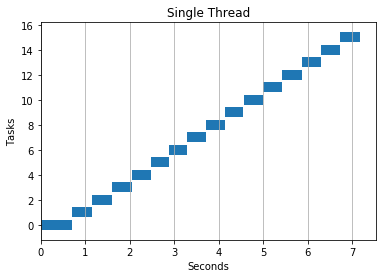

In [12]:
visualize_runtimes(multithreading(download, urls, 1), "Single Thread")

In [27]:

visualize_runtimes(multiprocessing(download, urls, 1), "Single Process")

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

In [22]:
if __name__=="__main":
    visualize_runtimes(multiprocessing(download, urls, 2), MULTIPROCESSING_TITLE)

In [17]:
if __name__ == '__main__' and '__file__' in globals():
    print("aaaa")

In [18]:
if __name__ == '__main__' and not callable(globals().get("get_ipython", None)):
    print ("I'm not loaded with IPython")

In [23]:
__name__=='__main__'

True

In [25]:
if __name__ == '__main__' and "get_ipython" not in dir():
    print ("I'm not loaded with IPython")

In [26]:
%edit

IPython will make a temporary file named: C:\Users\jtian\AppData\Local\Temp\ipython_edit_bu07utl1\ipython_edit_j9byyqeo.py
